In [56]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import sympy as sym
display.set_matplotlib_formats('svg')

C:\Users\Pablo\AppData\Local\Temp\ipykernel_7224\2866649856.py:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


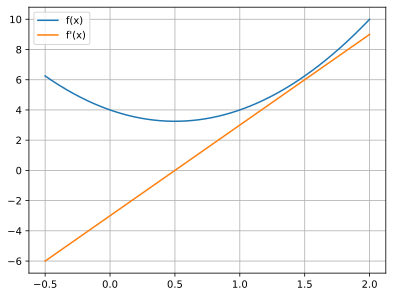

In [27]:
fx = lambda x: 3*x**2 - 3*x + 4
dx = lambda x: 6*x - 3

x = np.linspace(-.5, 2, 2001)

plt.plot(x, fx(x), label='f(x)')
plt.plot(x, dx(x), label="f'(x)")
plt.grid()
plt.legend(['f(x)', "f'(x)"])
plt.show()

In [38]:
# random starting point
local_min = np.random.choice(x, 1)[0] # select a random point from the x vector

learning_rate = 0.01
train_epochs = 100

modelparameters = np.zeros((train_epochs, 2)) # to store the parameters at each epoch
for i in range(train_epochs):
    gradient = dx(local_min)
    local_min = local_min - learning_rate * gradient
    modelparameters[i] = local_min, gradient

print(f"Local minimum occurs at x = {local_min:.4f} and f(x) = {fx(local_min):.4f}")

Local minimum occurs at x = 0.5011 and f(x) = 3.2500


Text(0, 0.5, 'Gradient')

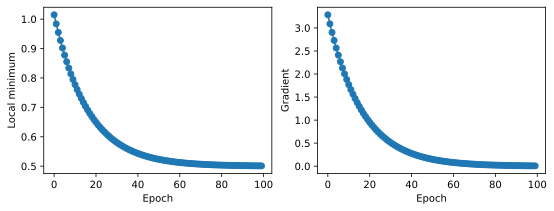

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(9, 3))
for i in range(2):
    ax[i].plot(modelparameters[:, i], 'o-')
    ax[i].set_xlabel("Epoch")

ax[0].set_ylabel("Local minimum")
ax[1].set_ylabel("Gradient")

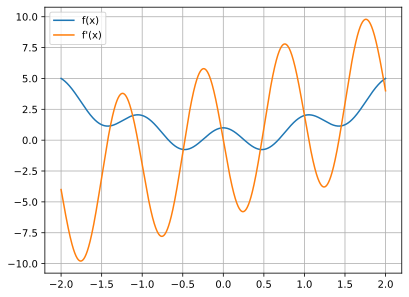

In [46]:
fx = lambda x: np.cos(2*np.pi*x) + x**2
dx = lambda x: -2*np.pi*np.sin(2*np.pi*x) + 2*x

x = np.linspace(-2, 2, 2001)

plt.plot(x, fx(x), label='f(x)')
plt.plot(x, dx(x), label="f'(x)")
plt.grid()
plt.legend(['f(x)', "f'(x)"])
plt.show()

In [51]:
#local_min = 0 # if selected 0, it will be stuck in a local maximum, so we select a random point
local_min = np.random.choice(x, 1)[0] # select a random point from the x vector

learning_rate = 0.01
train_epochs = 100

modelparameters = np.zeros((train_epochs, 2)) # to store the parameters at each epoch
for i in range(train_epochs):
    gradient = dx(local_min)
    local_min = local_min - learning_rate * gradient
    modelparameters[i] = local_min, gradient

print(f"Local minimum occurs at x = {local_min:.4f} and f(x) = {fx(local_min):.4f}")

Local minimum occurs at x = -1.4251 and f(x) = 1.1396


In [52]:
def peaks(x, y):
    # expand to a 2d mesh
    x, y = np.meshgrid(x, y)

    z = 3*(1-x)**2 * np.exp(-x**2 - (y+1)**2) \
        - 10*(x/5 - x**3 - y**5) * np.exp(-x**2-y**2) \
        - 1/3 * np.exp(-(x+1)**2 - y**2)
    return z

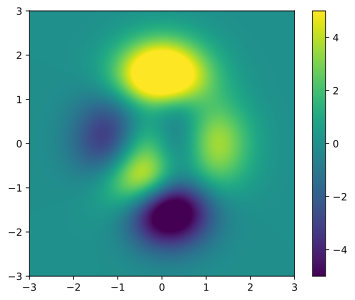

In [54]:
x = np.linspace(-3, 3, 2001)
y = np.linspace(-3, 3, 2001)
z = peaks(x, y)

# Plot the surface
plt.imshow(z, extent=(x[0], x[-1], y[0], y[-1]), origin='lower', cmap='viridis', vmin=-5, vmax=5)
plt.colorbar()
plt.show()

In [ ]:
sx, sy = sym.symbols('x y')

# same as before but now we use sympy to be able to derive the function
sz = 3*(1-sx)**2 * sym.exp(-sx**2 - (sy+1)**2) \
    - 10*(sx/5 - sx**3 - sy**5) * sym.exp(-sx**2-sy**2) \
    - 1/3 * sym.exp(-(sx+1)**2 - sy**2)

deriv_x = sym.diff(sz, sx)
deriv_y = sym.diff(sz, sy)

# using lambdify to create a function that can be evaluated at any point
# with lambdify we derive but creating a function that can be called with numerical values
# numpy is to specify the output type, in this case we want a numpy array, we can also 
# specify "sympy" to get a sympy expression
dz_x = sym.lambdify((sx, sy), deriv_x, "numpy")
dz_y = sym.lambdify((sx, sy), deriv_y, "numpy")

dz_x(1,1)

np.float64(-1.0736983365607882)

In [ ]:
local_min = np.random.choice(x, 1)[0], np.random.choice(y, 1)[0] # select a random point from the x and y vector
starting_point = local_min

learning_rate = 0.01
train_epochs = 1000

modelparameters = np.zeros((train_epochs, 2)) # to store the parameters at each epoch
for i in range(train_epochs):
    gradient_x = dz_x(local_min[0], local_min[1])
    gradient_y = dz_y(local_min[0], local_min[1])
    gradient = np.array([gradient_x, gradient_y])
    local_min = local_min - learning_rate * gradient # with "+" we would be doing gradient ascent
    modelparameters[i] = local_min

local_min # depends on the starting point we may fall in a local minimum

array([-0.00931758,  1.58136796])

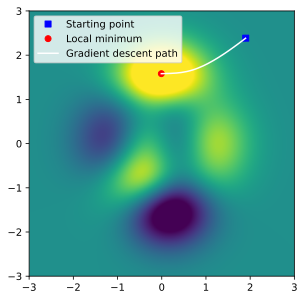

In [87]:
plt.imshow(z, extent=(x[0], x[-1], y[0], y[-1]), origin='lower', cmap='viridis', vmin=-5, vmax=5)
plt.plot(starting_point[0], starting_point[1], 'bs', label='Starting point')
plt.plot(local_min[0], local_min[1], 'ro', label='Local minimum')
plt.plot(modelparameters[:, 0], modelparameters[:, 1], 'w-', label='Gradient descent path')
plt.legend()
plt.show()

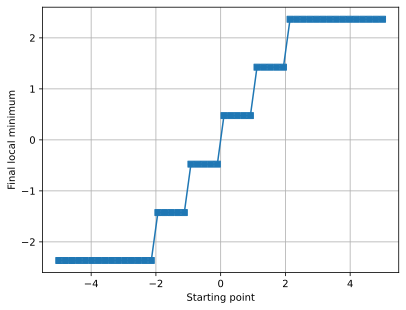

In [99]:
fx = lambda x: np.cos(2*np.pi*x) + x**2
dx = lambda x: -2*np.pi*np.sin(2*np.pi*x) + 2*x
x = np.linspace(-2, 2, 2001)

starting_local_min = np.linspace(-5, 5, 50)
final_local_min = np.zeros_like(starting_local_min)

learning_rate = 0.01
train_epochs = 100

for i in range(len(starting_local_min)):
    local_min = starting_local_min[i]
    for j in range(train_epochs):
        gradient = dx(local_min)
        local_min = local_min - learning_rate * gradient
    final_local_min[i] = local_min

# depends on the starting point we may fall in a local minimum, 
# if we start from different points we can see how the local minima are distributed
plt.plot(starting_local_min, final_local_min, "s-")
plt.xlabel("Starting point")
plt.ylabel("Final local minimum")
plt.grid()